In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

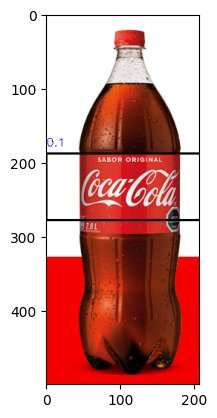

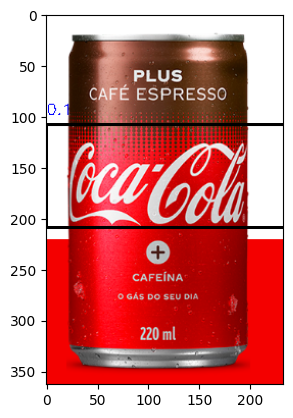

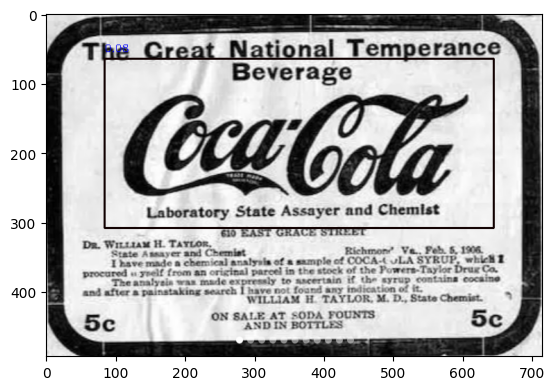

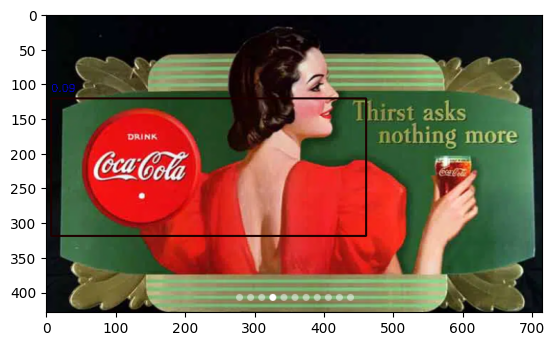

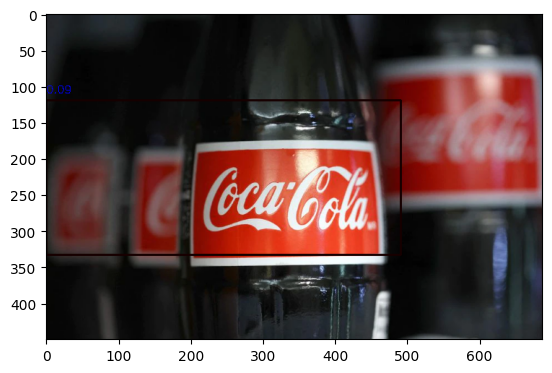

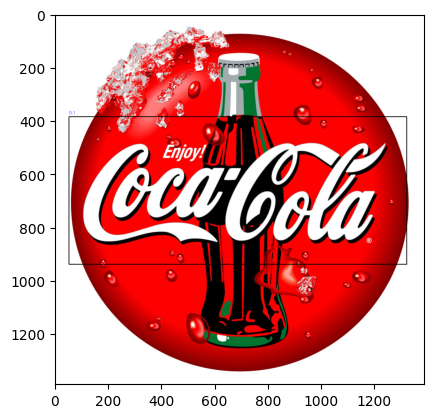

In [6]:
# PATRON
template = cv.imread('template/pattern.png')
template_rgb= cv.cvtColor(template, cv.COLOR_BGR2RGB)
template_gray= cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Aplicar deteccion de bordes
template_gray = cv.Canny(template_gray, 400, 400)

# # Invertir la imagen template
template_gray = cv.bitwise_not(template_gray)

#Lista de imagenes a cargar
images = glob.glob('images/*.png')
images.extend(glob.glob('images/*.jpg'))

# Eliminar de la lista la que se llama coca_multi.png
images = [x for x in images if x != 'images\\coca_multi.png']

# Definimos el threshold
threshold = 0.08
# threshold = 0.25

for image in images:
    # Cargamos la imagen a procesar
    # img = cv.imread('images/logo_1.png')
    img = cv.imread(image)
    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Aplicar deteccion de bordes
    img_gray = cv.Canny(img_gray, 400, 400)
    # Invertimos
    img_gray = cv.bitwise_not(img_gray)

    # plt.figure()
    # plt.imshow(img_gray, cmap='gray')
    # print(img_gray.shape)

    # Copias de las imagenes
    img_copy = img_rgb.copy()
    template_copy = template_gray.copy()

    # Iniciar con el mismo ancho de la imgaen, manteniendo la relacion de aspecto
    template_copy = cv.resize(template_copy, (img_gray.shape[1], int(img_gray.shape[1]*template_copy.shape[0]/template_copy.shape[1])))

    # plt.figure()
    # plt.imshow(template_copy, cmap='gray')

    for i in range(60):

        w, h = template_copy.shape[::-1]

        # print("Template: ", template_copy.shape)
        # Si el tamaño del template es mayor al de la imagen, pasar a la proxima
        if w > img_gray.shape[1] or h > img_gray.shape[0]:
            template_copy = cv.resize(template_copy, (0,0), fx=0.99, fy=0.99)
            i += 1
            # print("No actua en la iteracion: ", i)
            continue

        res = cv.matchTemplate(img_gray,template_copy,cv.TM_CCOEFF_NORMED)
        loc = np.where( res >= threshold)

        
        if (len(loc[0]) > 1):
            # Max value
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

            top_left = max_loc

            bottom_right = (top_left[0] + w, top_left[1] + h)
            cv.rectangle(img_copy,top_left, bottom_right, i*2, 2)

            # Agregar nivel de confianza
            cv.putText(img_copy, str(round(max_val, 2)), (top_left[0], top_left[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

            break;

        # plt.figure()
        # plt.imshow(template_copy, cmap='gray')
        
        # Reducir el tamaño del template
        # print("Reduccion numero: ", i)
        template_copy = cv.resize(template_copy, (0,0), fx=0.97, fy=0.97)
        i += 1

    plt.figure()
    plt.imshow(img_copy)
    plt.show()


Template:  (44, 100)
Cantidad de detecciones:  44
Template:  (42, 95)
Cantidad de detecciones:  101
Template:  (40, 90)
Cantidad de detecciones:  136
Template:  (38, 86)
Cantidad de detecciones:  93
Template:  (36, 82)
Cantidad de detecciones:  15
Template:  (34, 78)
Cantidad de detecciones:  3


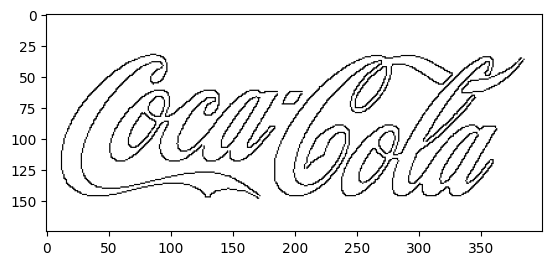

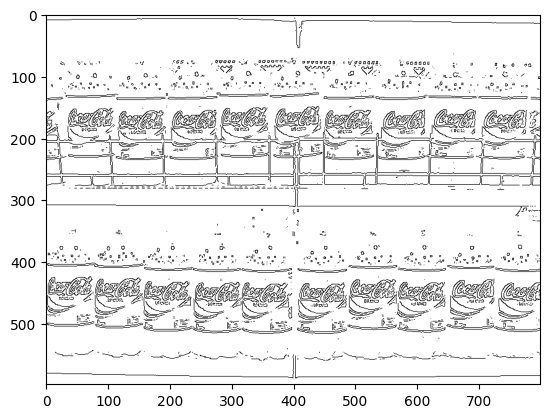

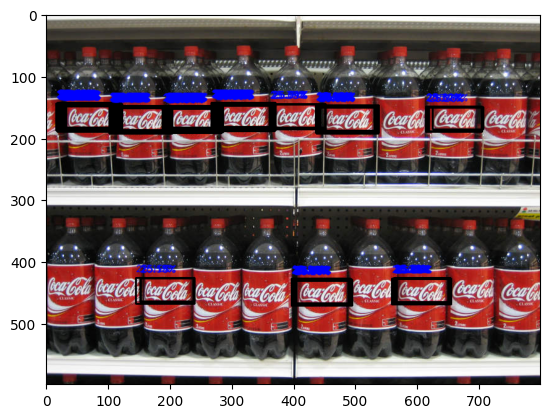

In [7]:
img_multi_rgb = cv.imread('images/coca_multi.png')
img_multi_rgb = cv.cvtColor(img_multi_rgb, cv.COLOR_BGR2RGB)
img_multi_gray = cv.cvtColor(img_multi_rgb, cv.COLOR_BGR2GRAY)
img_multi_gray = cv.Canny(img_multi_gray, 300, 300)
img_multi_gray = cv.bitwise_not(img_multi_gray)

template = cv.imread('template/pattern.png')
template_rgb= cv.cvtColor(template, cv.COLOR_BGR2RGB)
template_gray= cv.cvtColor(template, cv.COLOR_BGR2GRAY)
# Aplicar deteccion de bordes
template_gray = cv.Canny(template_gray, 300, 300)
# # Invertir la imagen template
template_gray = cv.bitwise_not(template_gray)

plt.figure()
plt.imshow(template_gray, cmap='gray')

# Plot image
plt.figure()
plt.imshow(img_multi_gray, cmap='gray')

template_copy = template_gray.copy()
img_copy = img_multi_rgb.copy()

threshold = 0.25

for i in range(33):

    w, h = template_copy.shape[::-1]

    # print("Template: ", template_copy.shape)
    # Si el tamaño del template es mayor al de la imagen, pasar a la proxima
    if w > img_multi_gray.shape[1] or h > img_multi_gray.shape[0]:
        template_copy = cv.resize(template_copy, (0,0), fx=0.95, fy=0.95)
        i += 1
        # print("No actua en la iteracion: ", i)
        continue

    res = cv.matchTemplate(img_multi_gray,template_copy,cv.TM_CCOEFF_NORMED)
    loc = np.where( res >= threshold)

    if (len(loc[0]) > 1):
        print("Template: ", template_copy.shape)
        print("Cantidad de detecciones: ", len(loc[0]));
        # Marco todas las detecciones
        for pt in zip(*loc[::-1]):
            
            top_left = pt
            bottom_right = (top_left[0] + w, top_left[1] + h)
            cv.rectangle(img_copy,top_left, bottom_right, 0, 2)
            
            # Agregar porcentaje de coincidencia
            cv.putText(img_copy, str(round(res[pt[1]][pt[0]]*100, 2)) + '%', (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv.LINE_AA)
        # break

    # plt.figure()
    # plt.imshow(template_copy, cmap='gray')
    
    # Reducir el tamaño del template
    # print("Reduccion numero: ", i)
    template_copy = cv.resize(template_copy, (0,0), fx=0.95, fy=0.95)
    i += 1

plt.figure()
plt.imshow(img_copy)
plt.show()


Template:  (607, 1389)
Reduccion numero:  0
Template:  (589, 1347)
Reduccion numero:  1
Template:  (571, 1307)
Reduccion numero:  2
Template:  (554, 1268)
Reduccion numero:  3
Template:  (537, 1230)
Reduccion numero:  4
Template:  (521, 1193)
Reduccion numero:  5
Template:  (505, 1157)
Reduccion numero:  6
Template:  (490, 1122)
Reduccion numero:  7
Template:  (475, 1088)
Reduccion numero:  8
Template:  (461, 1055)
Reduccion numero:  9
Template:  (447, 1023)
Reduccion numero:  10
Template:  (434, 992)
Reduccion numero:  11
Template:  (421, 962)
Reduccion numero:  12
Template:  (408, 933)
Reduccion numero:  13
Template:  (396, 905)
Reduccion numero:  14
Template:  (384, 878)
Reduccion numero:  15
Template:  (372, 852)
Reduccion numero:  16
Template:  (361, 826)
Reduccion numero:  17
Template:  (350, 801)
Reduccion numero:  18
Template:  (340, 777)
Reduccion numero:  19
Template:  (330, 754)
Reduccion numero:  20
Template:  (320, 731)
Reduccion numero:  21
Template:  (310, 709)
Reduccion

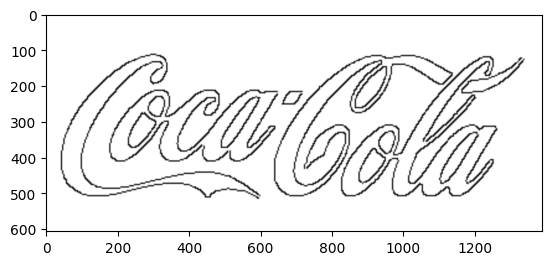

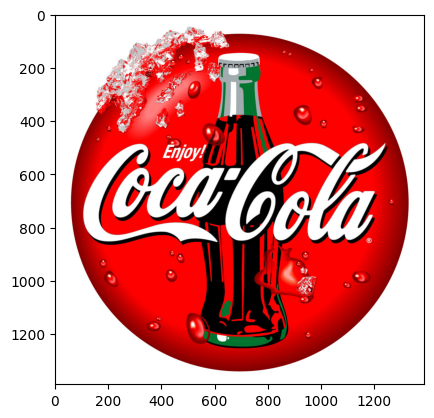

In [8]:
threshold = 0.2
img_copy = img_rgb.copy()
template_copy = template_gray.copy()

# Iniciar con el mismo ancho de la imgaen, manteniendo la relacion de aspecto
template_copy = cv.resize(template_copy, (img_gray.shape[1], int(img_gray.shape[1]*template_copy.shape[0]/template_copy.shape[1])))

plt.figure()
plt.imshow(template_copy, cmap='gray')

for i in range(60):

    w, h = template_copy.shape[::-1]

    print("Template: ", template_copy.shape)
    # Si el tamaño del template es mayor al de la imagen, pasar a la proxima
    if w > img_gray.shape[1] or h > img_gray.shape[0]:
        template_copy = cv.resize(template_copy, (0,0), fx=0.99, fy=0.99)
        i += 1
        # print("No actua en la iteracion: ", i)
        continue

    res = cv.matchTemplate(img_gray,template_copy,cv.TM_CCOEFF_NORMED)
    loc = np.where( res >= threshold)

    
    if (len(loc[0]) > 1):
        # Max value
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        top_left = max_loc

        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_copy,top_left, bottom_right, 0, 2)
        break;

    # plt.figure()
    # plt.imshow(template_copy, cmap='gray')
    
    # Reducir el tamaño del template
    print("Reduccion numero: ", i)
    template_copy = cv.resize(template_copy, (0,0), fx=0.97, fy=0.97)
    i += 1

plt.figure()
plt.imshow(img_copy)
plt.show()


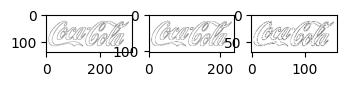

In [9]:
# Generar 5 variaciones de escalas de la imagen template con una variacion del 10% entre cada una
template_gray_1 = cv.resize(template_gray, (0,0), fx=0.80, fy=0.80)
template_gray_2 = cv.resize(template_gray, (0,0), fx=0.60, fy=0.60)
template_gray_3 = cv.resize(template_gray, (0,0), fx=0.40, fy=0.40)

plt.figure()
plt.subplot(1,5,1)
plt.imshow(template_gray_1, cmap='gray')
plt.subplot(1,5,2)
plt.imshow(template_gray_2, cmap='gray')
plt.subplot(1,5,3)
plt.imshow(template_gray_3, cmap='gray')



(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([470], dtype=int64), array([332], dtype=int64))
(array([ 416,  509,  510,  510,  512,  565,  748,  803,  814,  914,  915,
        916,  979,  989, 1162, 1163, 1164, 1167, 1168], dtype=int64), array([ 502,  936,  935,  936,  934,  558, 1048, 1051, 1044,  805,  810,
        808,  830,  818,  966,  965,  964,  960,  959], dtype=int64))


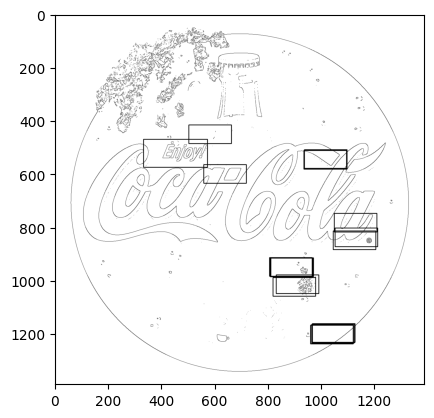

In [13]:
img_copy = img_gray.copy()

# Aplicamos template matching por casa escala
res_0 = cv.matchTemplate(img_gray,template_gray,cv.TM_CCOEFF_NORMED)
res_1 = cv.matchTemplate(img_gray,template_gray_1,cv.TM_CCOEFF_NORMED)
res_2 = cv.matchTemplate(img_gray,template_gray_2,cv.TM_CCOEFF_NORMED)
res_3 = cv.matchTemplate(img_gray,template_gray_3,cv.TM_CCOEFF_NORMED)

# Seteamos el umbral
threshold = 0.08

# Obtenemos las posiciones de los pixeles que superan el umbral
loc_0 = np.where( res_1 >= threshold)
print(loc_0)
loc_1 = np.where( res_1 >= threshold)
print(loc_1)
loc_2 = np.where( res_2 >= threshold)
print(loc_2)
loc_3 = np.where( res_3 >= threshold)
print(loc_3)

for pt in zip(*loc_0[::-1]):
    cv.rectangle(img_copy, pt, (pt[0] + template_gray.shape[1], pt[1] + template_gray.shape[0]), (255,0,0), 2)    

for pt in zip(*loc_1[::-1]):
    cv.rectangle(img_copy, pt, (pt[0] + template_gray_1.shape[1], pt[1] + template_gray_1.shape[0]), (255,0,0), 2)    

for pt in zip(*loc_2[::-1]):
    cv.rectangle(img_copy, pt, (pt[0] + template_gray_2.shape[1], pt[1] + template_gray_2.shape[0]), (0,255,0), 2)

for pt in zip(*loc_3[::-1]):
    cv.rectangle(img_copy, pt, (pt[0] + template_gray_3.shape[1], pt[1] + template_gray_3.shape[0]), (0,0,255), 2)

plt.figure()
plt.imshow(img_copy, cmap='gray')
plt.show()




(52, 120)
(array([213], dtype=int64), array([52], dtype=int64))


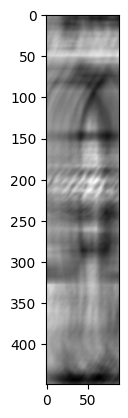

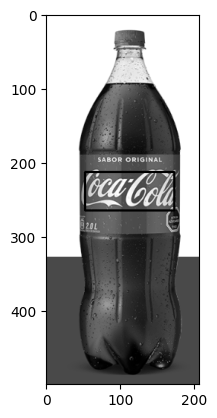

In [329]:
# Achicar el template a la mitad
template_gray_copy = template_gray.copy()

template_gray_copy = cv.resize(template_gray_copy, (0,0), fx=0.3, fy=0.3)

print(template_gray_copy.shape)

# Aplicamos template matching
img_copy = img_gray.copy()

res = cv.matchTemplate(img_copy,template_gray_copy,cv.TM_CCOEFF_NORMED)

# Mostrar res con escala de valores
plt.figure()
plt.imshow(res, cmap='gray')

# Definimos un umbral para el valor de correlacion
threshold = 0.225
loc = np.where( res >= threshold)
print(loc)

# Dibujamos un rectangulo en las zonas donde se encontro el template
for pt in zip(*loc[::-1]):
    cv.rectangle(img_copy, pt, (pt[0] + template_gray_copy.shape[1], pt[1] + template_gray_copy.shape[0]), (0,0,255), 2)

plt.figure()
plt.imshow(img_copy, cmap='gray')

plt.show()